In [1]:
import os
import math
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from sklearn.model_selection import train_test_split
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from statsmodels.stats.stattools import durbin_watson

from statsmodels.tsa.vector_ar.vecm import coint_johansen

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


# ADF Test Function

In [2]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [3]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [4]:
#case = pd.read_csv('UK/case.csv')
#mobility = pd.read_csv('UK/mobility.csv')
#weather = pd.read_csv('UK/weather_new.csv')
#case.set_index('date', inplace=True)
#mobility.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)


# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

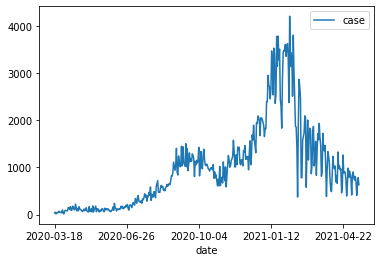

In [5]:
case.plot()
plt.show()

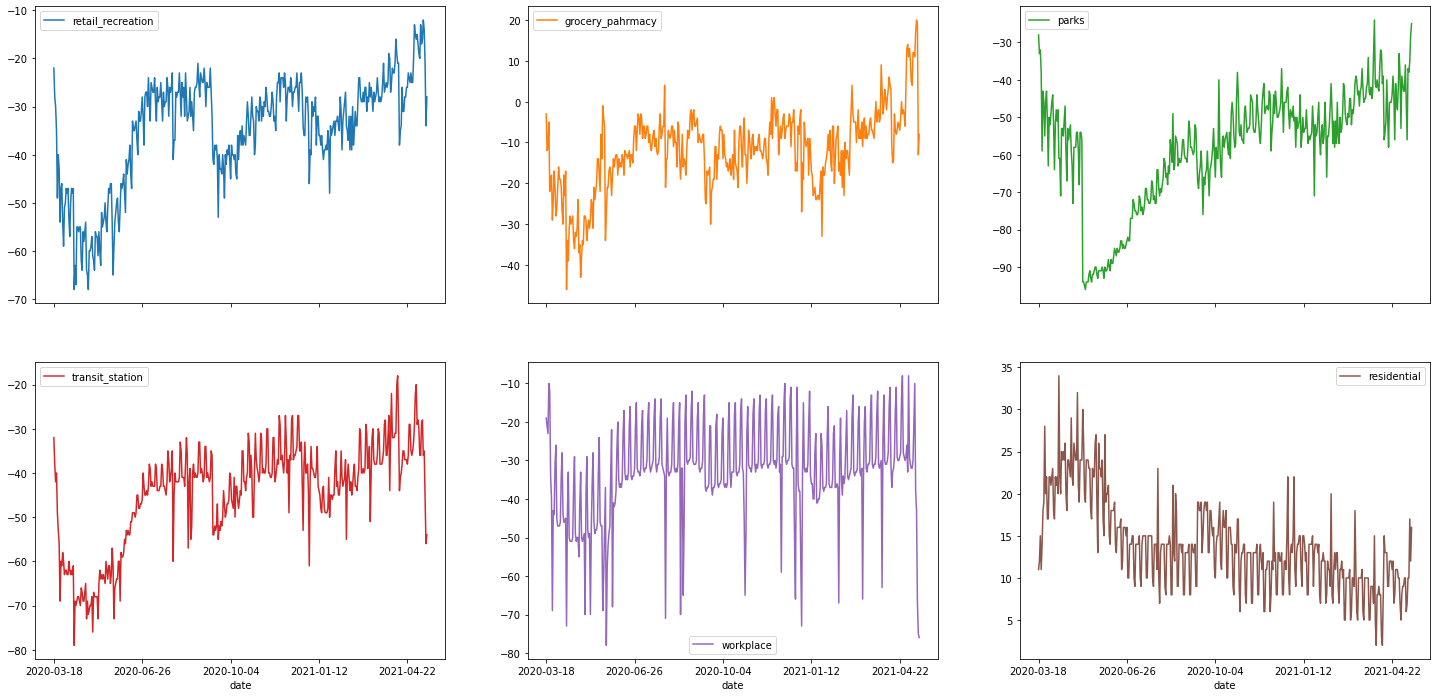

In [6]:
mobility.plot(subplots=True, layout=(2,3), figsize=(25,12))
plt.show()

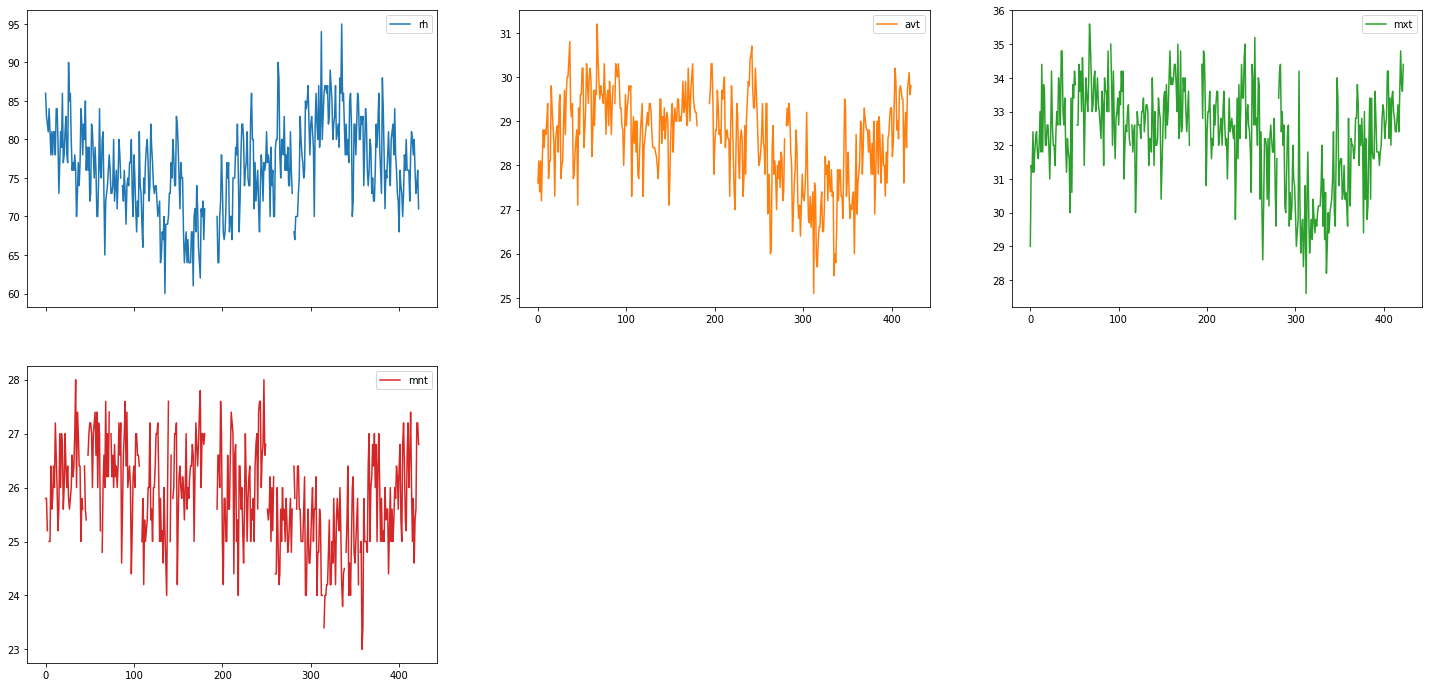

In [7]:
weather.plot(subplots=True, layout=(2,3), figsize=(25,12))
plt.show()

In [8]:
# ADF test untuk mobility london
for name, column in mobility.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "retail_recreation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8034
 No. Lags Chosen       = 14
 Critical value 1%     = -3.446
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.3788. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "grocery_pahrmacy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.0261
 No. Lags Chosen       = 13
 Critical value 1%     = -3.446
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.2753. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "parks" 
    -----------------------------------------------
 Null 

In [ ]:
# ADF test untuk mobility london
for name, column in case.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

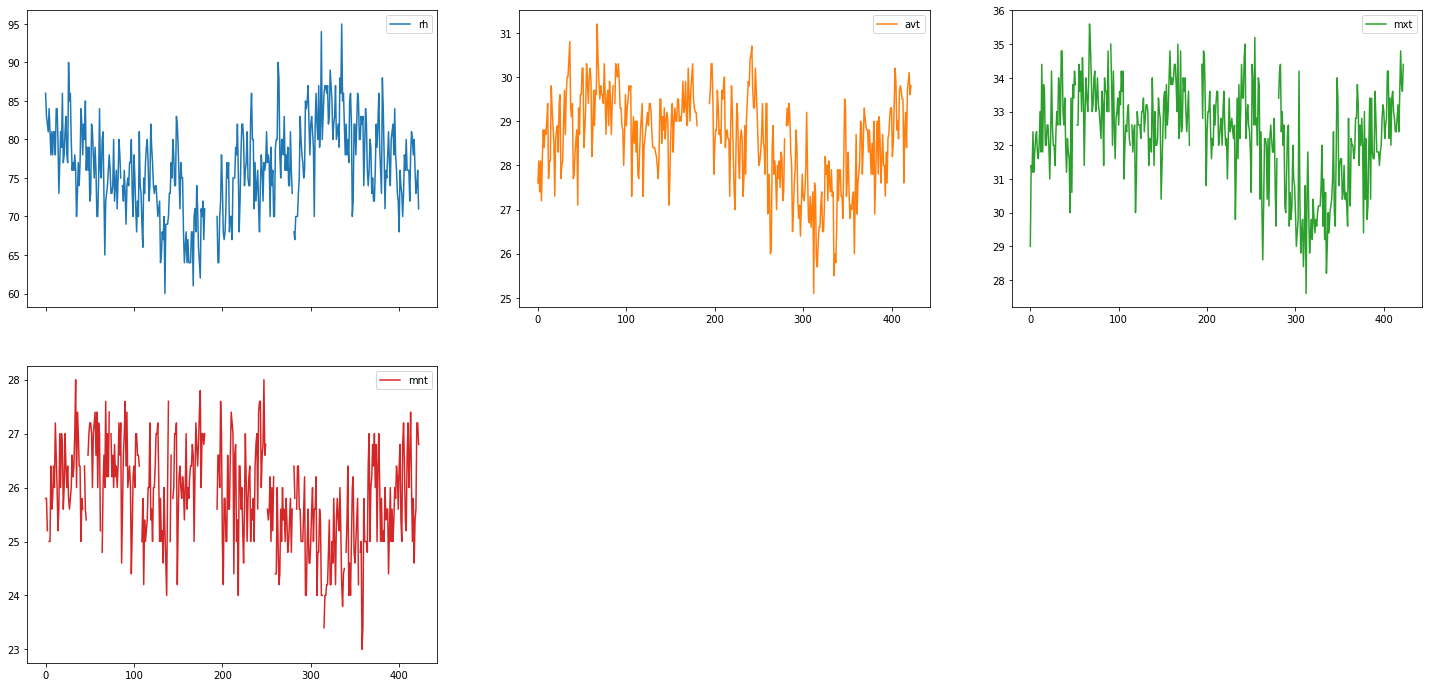

In [9]:
weather.plot(subplots=True, layout=(2,3), figsize=(25,12))
plt.show()

# interpolasi data weather

In [10]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [11]:
# ADF test untuk weather london
for name, column in new_weather.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "rh" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4071
 No. Lags Chosen       = 6
 Critical value 1%     = -3.446
 Critical value 5%     = -2.869
 Critical value 10%    = -2.57
 => P-Value = 0.0107. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "avt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.7355
 No. Lags Chosen       = 5
 Critical value 1%     = -3.446
 Critical value 5%     = -2.868
 Critical value 10%    = -2.57
 => P-Value = 0.0036. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "mxt" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05


In [12]:
mobility_diff = mobility.diff(periods=1)
mobility_diff = mobility_diff.iloc[1:]
case = case.iloc[1:]
case_diff = case.diff(periods=1)
case_diff = case_diff.iloc[1:]

new_weather = new_weather.iloc[1:]
mobility_diff.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-19,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,9.0,3.0,16.0,-4.0,-22.0,4.0


In [13]:
#weather_diff = weather.diff(periods=1)
#weather_diff = weather_diff.iloc[1:]
#weather_diff.head()

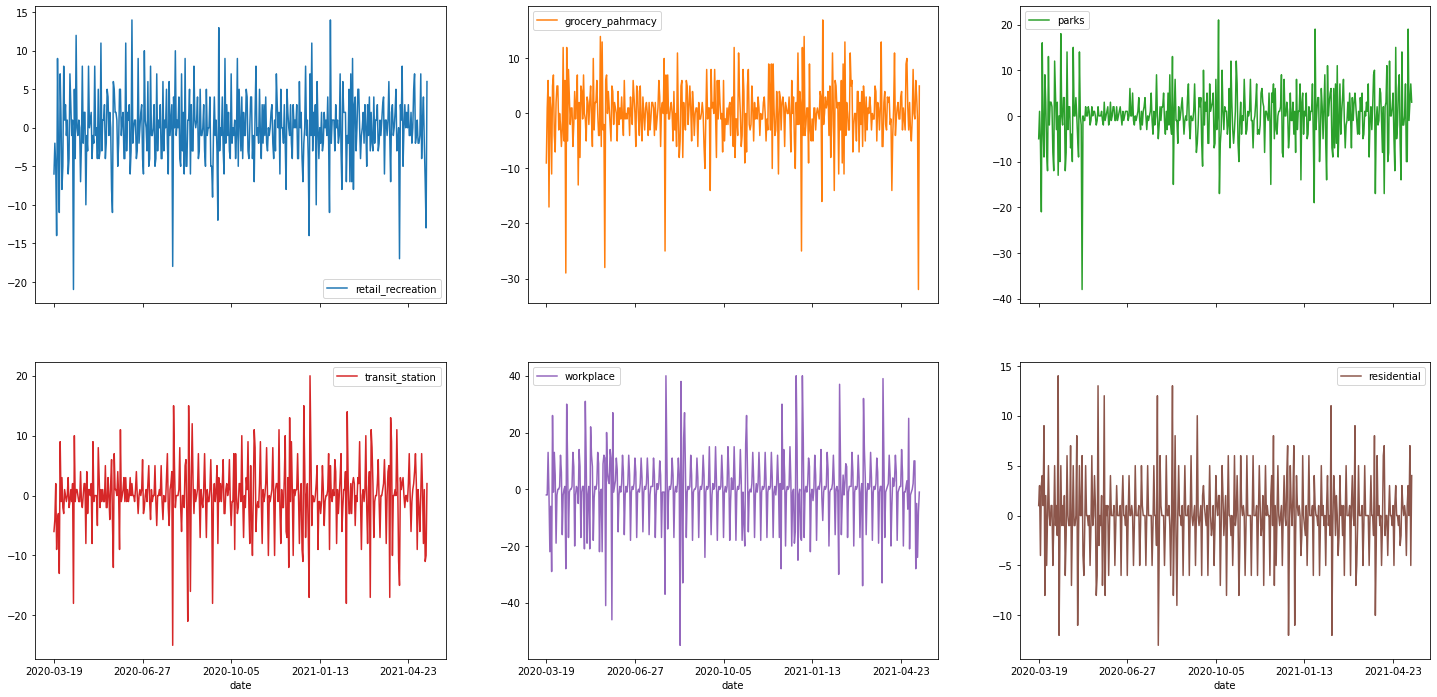

In [14]:
mobility_diff.plot(subplots=True, layout=(2,3), figsize=(25,12))
plt.show()

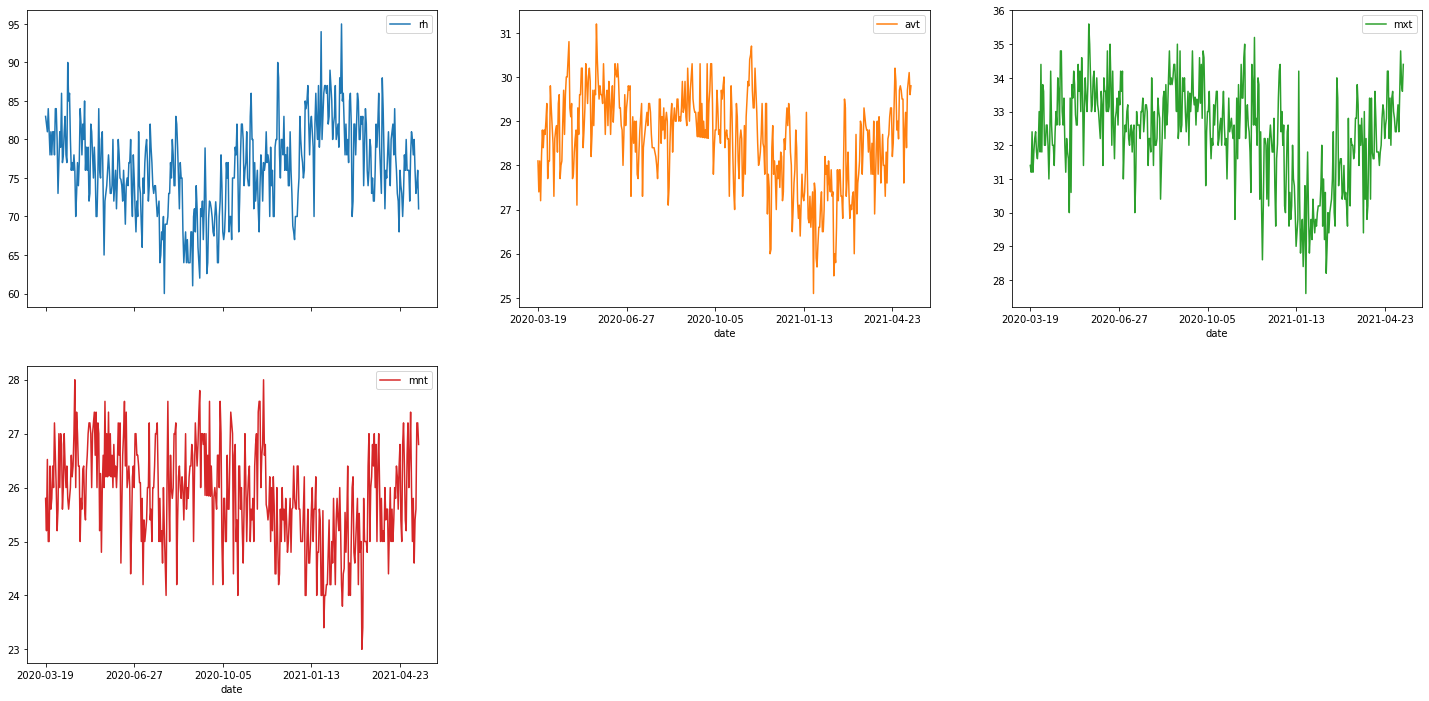

In [15]:
new_weather.plot(subplots=True, layout=(2,3), figsize=(25,12))
plt.show()

In [16]:
# ADF test untuk mobility london
for name, column in mobility_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "retail_recreation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.8636
 No. Lags Chosen       = 13
 Critical value 1%     = -3.446
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "grocery_pahrmacy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1786
 No. Lags Chosen       = 12
 Critical value 1%     = -3.446
 Critical value 5%     = -2.869
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "parks" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 S

In [17]:
data = pd.concat([case, new_weather, mobility_diff], axis=1)
data.head()

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-19,50,83.0,28.1,31.4,25.800000,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,14,82.0,27.4,31.2,25.200000,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,44,81.0,28.1,32.4,26.521978,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,36,84.0,27.2,31.2,25.000000,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,51,81.0,28.2,31.8,25.000000,9.0,3.0,16.0,-4.0,-22.0,4.0


In [18]:
cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
case   ::  1456.9    > 263.2603  =>   True
rh     ::  793.77    > 219.4051  =>   True
avt    ::  613.92    > 179.5199  =>   True
mxt    ::  459.34    > 143.6691  =>   True
mnt    ::  336.21    > 111.7797  =>   True
retail_recreation ::  232.4     > 83.9383   =>   True
grocery_pahrmacy ::  145.62    > 60.0627   =>   True
parks  ::  84.63     > 40.1749   =>   True
transit_station ::  25.71     > 24.2761   =>   True
workplace ::  2.51      > 12.3212   =>   False
residential ::  0.01      > 4.1296    =>   False


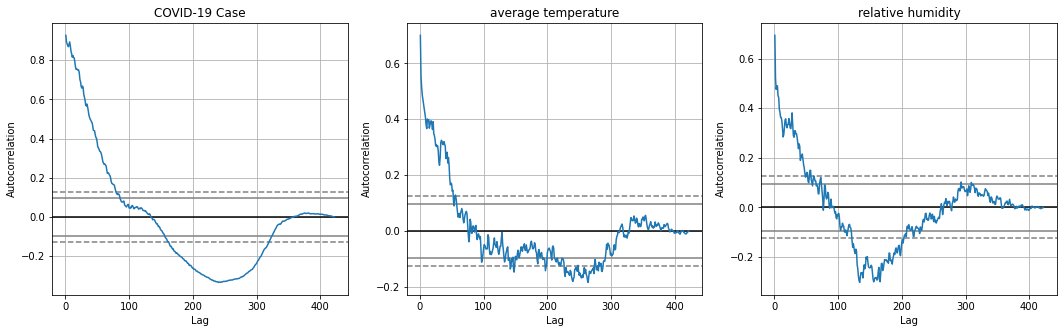

In [19]:
f3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

autocorrelation_plot(data['case'], ax=ax1)
ax1.set_title('COVID-19 Case');

autocorrelation_plot(data['avt'], ax=ax2)
ax2.set_title('average temperature');

autocorrelation_plot(data['rh'], ax=ax3)
ax3.set_title('relative humidity');

plt.show()

In [20]:
#autocorrelation_plot(data['case'])
#autocorrelation_plot.set_title('COVID-19 Case');


In [21]:
model = VAR(data)
lag_orders = model.select_order(15)
lag_orders.summary()

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


,AIC,BIC,FPE,HQIC
0,29.83,29.93,8.974e+12,29.87
1,25.84,27.14*,1.668e+11,26.35
2,25.14,27.64,8.327e+10,26.13*
3,25.01,28.70,7.315e+10,26.47
4,24.86,29.73,6.292e+10,26.78
5,24.48,30.54,4.351e+10,26.88
6,23.67,30.93,1.979e+10,26.55
7,23.64*,32.10,1.958e+10*,26.99
8,23.78,33.43,2.312e+10,27.60
9,24.06,34.89,3.144e+10,28.35


In [22]:
lag_order = 4
results = model.fit(lag_order, ic="aic")
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Aug, 2021
Time:                     14:54:42
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    29.6267
Nobs:                     418.000    HQIC:                   26.7371
Log likelihood:          -11222.5    FPE:                6.24165e+10
AIC:                      24.8479    Det(Omega_mle):     2.02697e+10
--------------------------------------------------------------------
Results for equation case
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     2911.756702      1307.341029            2.227           0.026
L1.case                      0.575322         0.051010           11.279           0.000
L1.rh                       -6.52

In [23]:
results.resid

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,,,,,,
2020-03-23,-103.558446,-0.986241,0.392767,0.135871,-0.157450,0.709611,-1.423398,7.223861,-4.625278,-17.412443,4.026374
2020-03-24,123.916418,0.924553,0.129586,-0.642663,0.537603,-2.580566,0.406464,-5.384891,-1.770706,-1.573257,0.363883
2020-03-25,-5.637746,3.790939,-0.492639,-0.606680,-0.406805,-10.540533,-8.104597,-10.744468,-13.233180,-31.521667,9.495983
2020-03-26,-234.525140,-0.610327,0.058765,-0.624791,0.087328,3.464845,2.644361,6.006631,5.347676,11.692497,-2.593172
2020-03-27,-31.088477,3.935511,-0.298777,-1.090078,0.081019,3.424916,8.997257,2.693169,0.624170,-0.012246,0.347374
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,-39.944653,-3.335072,0.832826,0.998845,-0.789075,-1.044145,0.897107,7.160780,-4.207984,-10.104084,0.287685
2021-05-11,-134.731124,-4.666141,0.685352,1.816965,-0.855894,4.146025,11.903827,4.544428,3.369969,-6.863267,-0.782201
2021-05-12,-163.961800,-0.486830,0.448120,0.533189,0.558228,-5.603891,3.895565,4.991714,-9.592650,-23.001273,6.596093


In [24]:
out = durbin_watson(results.resid)

for col, val in zip(data.columns, out):
    print((col), ':', round(val, 2))

case : 2.08
rh : 2.0
avt : 1.99
mxt : 2.03
mnt : 2.0
retail_recreation : 1.99
grocery_pahrmacy : 2.02
parks : 2.0
transit_station : 2.04
workplace : 2.12
residential : 2.0


In [25]:
fc = results.forecast(data.values[-lag_order:], steps=17)
fc = pd.DataFrame(fc, columns=["case", "rh", "avt", "mxt", "mnt", "retail_recreation","grocery_pahrmacy","parks","transit_station","workplace","residential"])
fc

,case,rh,avt,mxt,mnt,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
0,505.402438,68.568039,30.510588,34.771762,26.596112,9.711090,13.115316,6.239236,7.007715,0.014850,-0.446021
1,610.266969,70.615741,30.366765,34.461202,27.222853,-6.924107,-1.734698,-10.518456,5.317924,21.468556,-6.533532
2,620.022030,74.204534,29.866106,32.959967,27.091547,4.375236,-0.068620,0.292247,-3.691270,-8.826305,5.126916
3,569.293743,75.079494,29.322477,32.997251,26.889065,-0.554012,2.483202,2.420930,-0.178116,-5.699683,-0.497477
4,519.782541,74.506023,29.217164,33.406014,26.409543,-3.515141,-5.185060,-3.619612,0.383021,9.095708,-1.513917
5,526.915385,74.199780,29.274150,33.313065,26.338158,2.730863,2.595602,2.150647,-0.780398,-8.194549,0.384828
6,494.034837,74.208834,29.169387,33.115019,26.314420,-0.974946,-1.217258,0.463384,-1.216809,0.039370,1.350906
7,478.347944,74.441911,29.257703,33.300009,26.387699,2.112265,2.442802,1.783139,0.866819,-1.115326,0.047210
8,512.122451,74.540338,29.116373,32.949153,26.246285,-2.669209,-1.907942,-3.049458,1.858921,5.974062,-2.335333
9,540.773807,74.603366,29.153614,32.992955,26.282568,1.596626,0.579541,1.277770,-1.498911,-2.891170,1.726492


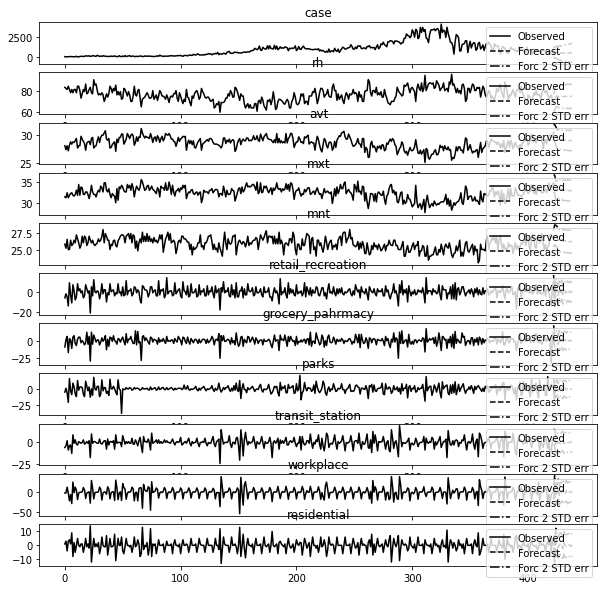

In [26]:
results.plot_forecast(17);

In [27]:
evalu = pd.read_csv('data/new/evaluation.csv')

In [28]:
evalu.shape

(17, 2)

In [29]:
fc.shape

(17, 11)

In [30]:
list_eval = evalu['case'].tolist()
list_hasil = fc['case'].tolist()


In [31]:
test_list = [int(i) for i in list_hasil]
test_list

[505,
 610,
 620,
 569,
 519,
 526,
 494,
 478,
 512,
 540,
 495,
 506,
 527,
 520,
 517,
 538,
 552]

In [32]:
mse = mean_squared_error(list_eval, test_list)
mse

99385.23529411765

In [33]:
rmse = mean_squared_error(list_eval, test_list, squared=False)
rmse

315.25423913742645

In [34]:
mae = mean_absolute_error(list_eval, test_list)
mae

284.7647058823529